# Data Story: College Scorecard and Post-Graduate Success
by James Catterall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

&emsp;This capstone project is investigating post-collegiate outcomes for students based on data from the US Department of Education's College Scorecard on the colleges they went to. For the Data Story portion of the project, we will specifically be focusing on monthly faculty salary, a variable that did not come to mind at first when considering the qualities of a "good" college. Some of the questions that we will be asking include:
* How does faculty salary differ between different types of colleges?
* At what collges are faculty paid the most? Where are faculty paid the least?
* Does the amount that faculty get paid have an impact on the outcomes of students after graduation?

## Reading in the Data

In [2]:
cleaned=pd.read_csv('2014_cleaned.csv', dtype={'zip':'category'})
for column in [col for col in cleaned if 'bach' in col]:
    cleaned[column]=cleaned[column].astype('category')
for column in ['open_admissions_policy','zip','region_id','ownership','online_only','id']:
    cleaned[column]=cleaned[column].astype('category')

## Faculty Salary: Initial Exploration
&emsp;First, we make a histogram to get an idea for how the values for average monthly faculty salary are spread out across the dataset.

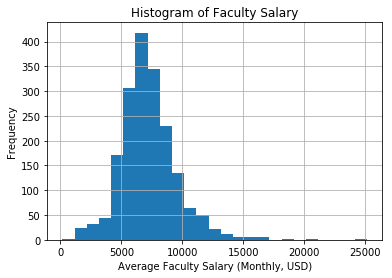

In [29]:
cleaned['faculty_salary'].hist(bins=25)
plt.xlabel("Average Faculty Salary (Monthly, USD)")
plt.ylabel('Frequency')
plt.title('Histogram of Faculty Salary')
plt.show()

&emsp;Based on the histogram, the median monthly salary for college faculty appears to be around \\$7,000. If we assume that college faculty work nine months full-time, then that would come out to a yearly salary of at least \\$63,000. The distribution of salaries is also very positively skewed, as there are a few outlying colleges with average monthly salaries between \\$17,500 and \\$25,000. On the other end, there are relatively few colleges where salaries are below \\$4,000, and almost none where salaries are below \\$1,000.

&emsp;Next, we will look at which colleges have the highest and lowest teacher pay. 

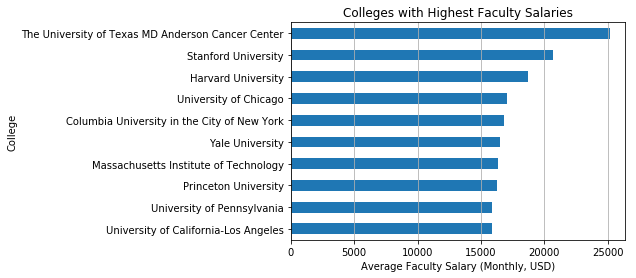

In [33]:
#what schools pay teachers the most?
cleaned[['name','faculty_salary']].sort_values(
    by="faculty_salary").tail(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.title('Colleges with Highest Faculty Salaries')
plt.xlabel('Average Faculty Salary (Monthly, USD)')
plt.ylabel('College')
plt.show()

All of the schools listed here are large research universities with very significant graduate schools, so professors at these schools spend a lot of time either instructing high-level/research-based courses or conducting (and eventually publishing) peer-reviewed articles. In particular, facutly at The University of Texas MD Anderson Cancer Society had an average salary almost \\$5,000 higher than faculty at Stanford, which has the second-highest faculty salary. This is likely due to the university's specific focus on cancer prevention and treatment, which would be highly in demand.

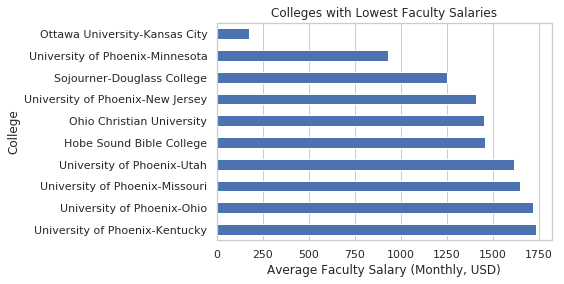

In [66]:
#what schools pay teachers the least?
cleaned[['name','faculty_salary']].sort_values(
    by="faculty_salary",ascending=False).tail(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='y')
plt.title('Colleges with Lowest Faculty Salaries')
plt.xlabel('Average Faculty Salary (Monthly, USD)')
plt.ylabel('College')
plt.show()

Of the 10 colleges with the lowest faculty salaries, 6 of them are part of the University of Phoenix for-profit college chain, three of the schools are private Christian colleges, and one of the schools (Sojourner-Douglass College) had its accreditation revoked in 2015 and no longer exists. As indicated by the histogram, only two schools pay their faculty less than \\$1,000 a month, with the salary at the lowest-paying school being around \\$200 and over four times lower than the second-lowest school. 

Finally, we look at how 

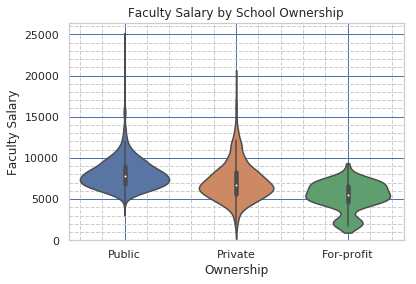

In [92]:
# How much are teachers paid? What kind of school is more profitable to work at?
sns.set(style="whitegrid")
ax = sns.violinplot(x="ownership", y='faculty_salary', data=cleaned,cut=0)
# cleaned.boxplot(column='faculty_salary', by='ownership',patch_artist=True)
plt.xticks(np.arange(start=0,stop=3), ('Public', 'Private', 'For-profit'))
plt.ylabel('Faculty Salary')
# plt.suptitle('')
plt.title('Faculty Salary by School Ownership')
plt.xlabel('Ownership')
plt.minorticks_on()
plt.grid(b=True, which='major', color='b',linestyle='-')
plt.ylim(ymin=0)
plt.grid(b=True, which='minor', linestyle='--')
plt.show()
# cleaned[cleaned['ownership']==2]['faculty_salary'].median()

On average, publicly-owned colleges pay their faculty the most, with a median salary slightly above \\$7,500. Private schools pay their staff the second most, with a median salary slightly below \\$7,000. For-profit colleges pay the least on average - their median salary is around \\$5,500. This matches with how the colleges with the lowest salaries in the previous graph were mostly for-profit institutions. 

Now that we have an understanding of what faculty salary is like at different intstitutions, we will now take a look at how it relates to other variables in our dataset - specifically, mean earnings and completion rate. 

While there is a noticeable correlation between tuition and mean earnings, going to a school with a higher sticker price only has a modest effect on earnings after graduation. Moreover, there are several outliers to this general trend. For example, there are several schools with a tuition below \\$10,000 whose former students were earning over \\$60,000 after graduation, and a few schools with a tuition close to or above \\$50,000 whose students earned less than $40,000 after graduation.

## Faculty Salary and Student Success

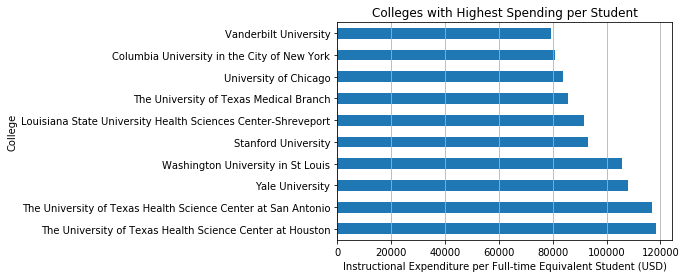

In [10]:
#what schools spend the most on students?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte",ascending=False).head(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.title('Colleges with Highest Spending per Student')
plt.xlabel('Instructional Expenditure per Full-time Equivalent Student (USD)')
plt.ylabel('College')
plt.show()

Four of the colleges that have the highest per-student spending have "Medical" or "Health" in their name. However, since the term "full-time equivalent student" includes graduate students as well, it's unclear whether this variable truly reflects the amount spend on undergraduate education, or if a disproportionate amount of money is spent on graduate research programs in comparison.

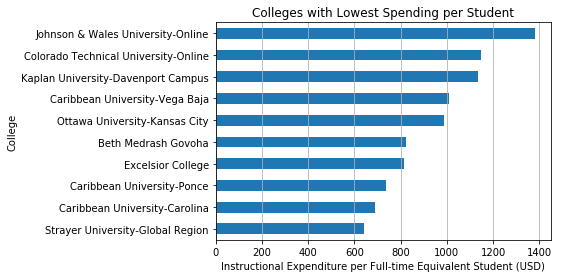

In [12]:
#what schools spend the least?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte").head(10).set_index('name').plot(
    kind='barh',legend=None)
plt.grid(axis='x')
plt.xlabel('Instructional Expenditure per Full-time Equivalent Student (USD)')
plt.ylabel('College')
plt.title('Colleges with Lowest Spending per Student')
plt.show()

Of note is that three of the colleges in this graph are online-only (which reduces the need to spend money on physical resources), three are in Puerto Rico, and three are for-profit. 

## Post-Graduate Success
### Student Earnings (6 Years After Entry)

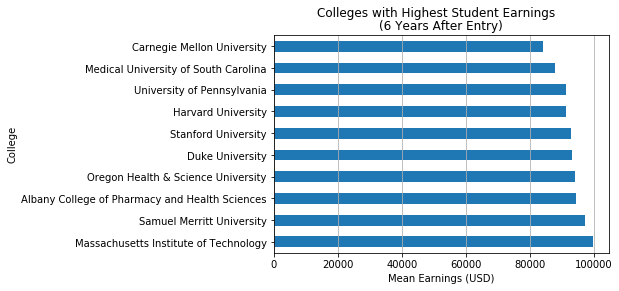

In [127]:
#what schools have the highest post-grad earnings?
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings",ascending=False).head(10).set_index('name').plot(
    kind='barh',legend=False, title="(6 Years After Entry)")
plt.grid(axis='x')
plt.suptitle('Colleges with Highest Student Earnings')
plt.xlabel('Mean Earnings (USD)')
plt.ylabel('College')
plt.show()

The colleges included here are either large research institutions or medical schools. The latter makes sense, since the medical field is very lucrative. 

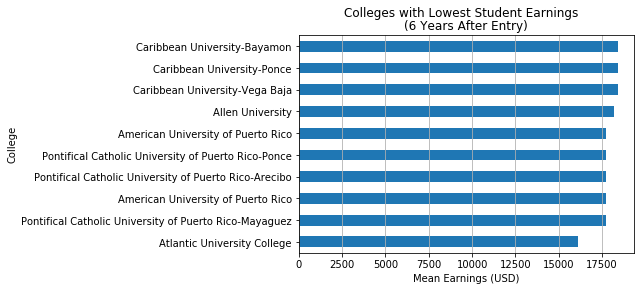

In [128]:
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings").head(10).set_index('name').plot(
    kind='barh',legend=False, title="(6 Years After Entry)")
plt.grid(axis='x')
plt.suptitle('Colleges with Lowest Student Earnings')
plt.xlabel('Mean Earnings (USD)')
plt.ylabel('College')
plt.show()

\[American University of Puerto Rico is includeed in the graph twice because it has different campuses.\]

Out of the 10 colleges with the lowest post-graduate earnings, all but one of them (Allen University) are located in Puerto Rico.

Finally, I decided to look at a correlation from earlier that caught my eye: faculty salary vs mean earnings 6 years after entering the labor force.

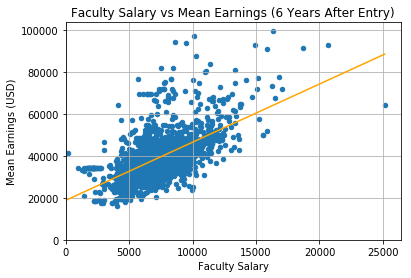

In [231]:
# Is there really a correlation between faculty salary and post-grad earnings?
cleaned.plot(kind='scatter', x='faculty_salary', y='6_yrs_AE.WNE.mean_earnings')
plt.xlabel('Faculty Salary')
plt.ylabel('Mean Earnings (USD)')
plt.title('Faculty Salary vs Mean Earnings (6 Years After Entry)')
a, b = np.polyfit(cleaned['faculty_salary'],cleaned['6_yrs_AE.WNE.mean_earnings'],1)
x_theor = np.array([0, max(cleaned['faculty_salary'])])
y_theor= a*x_theor+b
plt.plot(x_theor,y_theor,color='orange')
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()


There appears to be a significant correlation between faculty salary and mean earnings, especially between \\$0 and \\$15,000 on the x-axis. Further investigation might be useful to determine whether the cause of this correlation is an actual link between how much teachers are paid and how much their students earn, or a confounding variable which influences both variables.

### Student Default Rates by School Ownership

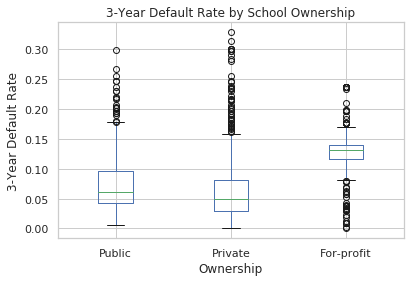

In [79]:
cleaned.boxplot(column='3_yr_default_rate', by='ownership')
plt.xticks(np.arange(start=1,stop=4), ('Public', 'Private', 'For-profit'))
plt.ylabel('3-Year Default Rate')
plt.suptitle('')
plt.title('3-Year Default Rate by School Ownership')
plt.xlabel('Ownership')
plt.show()

Although there are a few public and private colleges with significantly higher default rates than average, for-profit colleges have a significantly higher default rate on average at around 0.13. The interquartile range of the boxplot in the for-profit column contains only values which are greater than 0.10. In comparison, the public and private columns' interquartile ranges are all below 0.10.

### Completion Rate vs Repayment Rate
Our final graph is a scatterplot of the 150% completion rate at each school versus the percentage of students who have repaid at least part of their debt one year after leaving school and are not in default.  

Text(0.5,1,'150% Completion Rate vs 1-Year Partial Repayment Rate')

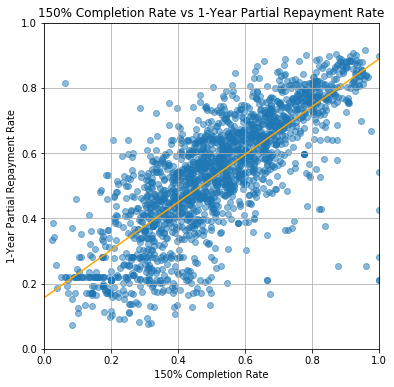

In [208]:
# Is there a correlation between 150% completion rate and repay rate?
subplot=cleaned[(cleaned['compl_rate_4yr_150nt'].notnull()) & (cleaned['1_yr_repay.overall_rate'].notnull())][[
    'compl_rate_4yr_150nt','1_yr_repay.overall_rate'
]]

a, b = np.polyfit(subplot['compl_rate_4yr_150nt'],subplot['1_yr_repay.overall_rate'],1)
x_theor = np.array([0, 1])
y_theor= a*x_theor+b

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(subplot['compl_rate_4yr_150nt'], subplot['1_yr_repay.overall_rate'], alpha=0.5)
ax.plot(x_theor,y_theor,color='orange')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('150% Completion Rate')
ax.set_ylabel('1-Year Partial Repayment Rate')
ax.grid(True)
ax.set_title('150% Completion Rate vs 1-Year Partial Repayment Rate')

This scatterplot suggests a strong correlation between completion rate and repayment of student debt. Intuitively this makes sense - students who complete their education and receive their degrees are more likely to find well-paying jobs than those who don't graduate, which makes it easier to pay off student loan debt. Of interest are some of the outliers - such as one school with a 0.2 repayment rate and a completion rate of 1, and another with a completion rate less than 0.1 and a repayment rate above 0.8. What might be causing those outliers is a possible topic that could be explored further. 

## Conclusion and Potential Hypotheses

Overall, there are several takeaways we can draw from these visualizations. First, the cost of a school does not necessarily translate to the school's quality - 

* How does the average cost of public college compare with the average cost of living in each of the states?  
* How does the cost of public college in each state compare with the amount of funding the public educational system provided by the state budget?
* Is there an actual link between faculty salary and post-graduation earnings? Or is there something else correlated with both variables?